In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
random.seed(230)

# ResNet18 with ResNext distillation: confusion matrix (dev)

In [7]:
# model_dir = 'experiments/base_resnet18'
model_dir = '../experiments/resnet18_distill/resnext_teacher/'

confusion_matrix = np.loadtxt(os.path.join(model_dir, 'dev_temp1.0_confusion_matrix.txt')).T
    
print(confusion_matrix.shape)

(10, 10)


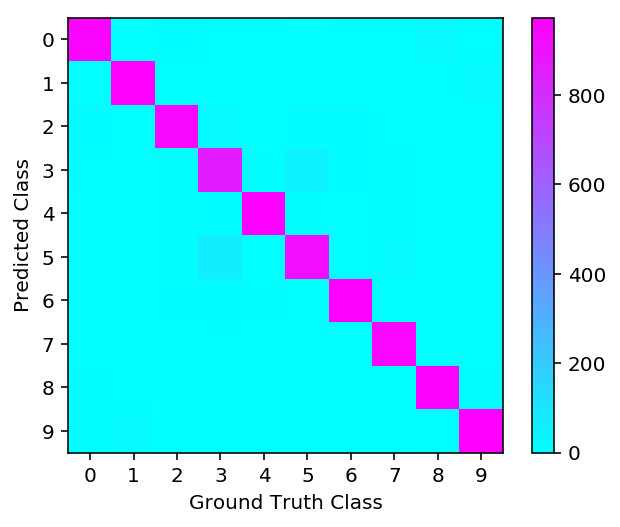

In [16]:
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)
fig, ax = plt.subplots()
im = plt.imshow(confusion_matrix, cmap='cool')
plt.xlabel('Ground Truth Class')
plt.ylabel('Predicted Class')
plt.xticks(x)
plt.yticks(y)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.20)

plt.colorbar(im, cax=cax)


plt.show()

In [10]:
# Save figure 1
fig.savefig('confusion_matrix.png', dpi=600, bbox_inches='tight')

# Resnet18-distill w/ ResNext teacher

- Visualize original vs. softtened softmax output distributions on train set 




In [4]:

# model_dir = 'experiments/base_resnet18'
model_dir = '../experiments/resnet18_distill/resnext_teacher/'

temp_list = ['1.0', '2.0', '6.0', '20.0']
softmax_scores_temp = {}
for temp in temp_list:
    softmax_scores_temp[temp] = np.loadtxt(os.path.join(model_dir,
                                           'train_temp{}_softmax_scores.txt'.format(temp))).T

# assert softmax_scores.shape == (10, 50000)

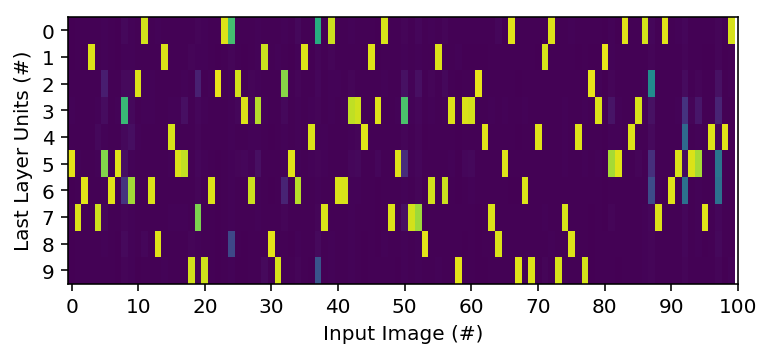

In [52]:
fig3 = plt.figure(3)

y = np.arange(0, 10, 1)
x = np.arange(0, 101, 10)

ax = plt.subplot(111)
im = plt.imshow(softmax_scores_temp["1.0"][:, :100], aspect=4, vmin=0, vmax=1.0)
plt.xlabel('Input Image (#)')
plt.ylabel('Last Layer Units (#)')
plt.xticks(x)
plt.yticks(y)

plt.show()

- four subplots of temperatures

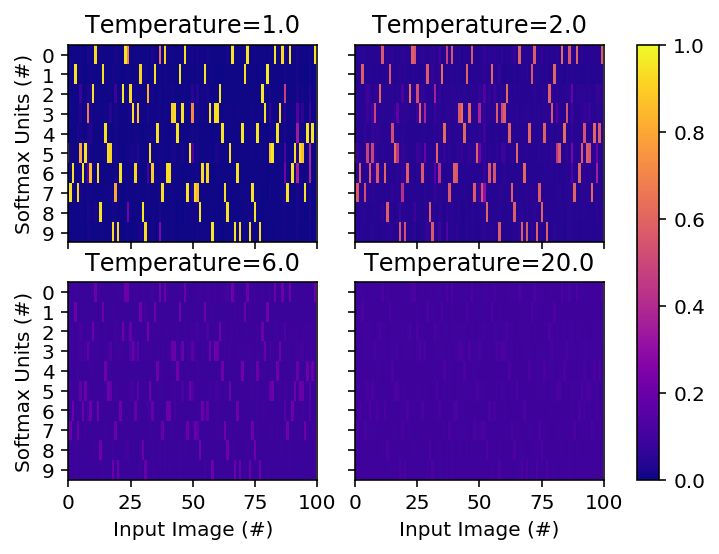

In [137]:
fig, axes = plt.subplots(nrows=2, ncols=2)

y = np.arange(0, 10, 1)
x = np.arange(0, 100, 20)
titles = ['Temperature=1.0', 'Temperature=2.0', 'Temperature=6.0', 'Temperature=20.0']

for idx, ax in enumerate(axes.flat):
    im = ax.imshow(softmax_scores_temp[temp_list[idx]][:, :100], cmap='plasma', aspect='auto', vmin=0, vmax=1.0)
    ax.set(title=titles[idx], xlabel='Input Image (#)', ylabel='Softmax Units (#)')
    ax.set_xlim(0,100)
    ax.label_outer()   # Hide x labels and tick labels for top plots and y ticks for right plots.

plt.setp(axes, yticks=y)  #set all axes properties at once
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.15, hspace=None)
fig.colorbar(im, ax=axes.ravel().tolist())


plt.show()

In [138]:
#save figure
fig.savefig('ResNext_dark_knowledge.png', dpi=600, bbox_inches='tight')

# Analysis of ResNet18 prediction errors
- ResNet18 with ResNext distillation vs. original ResNet18


(582,)
(527,)
279


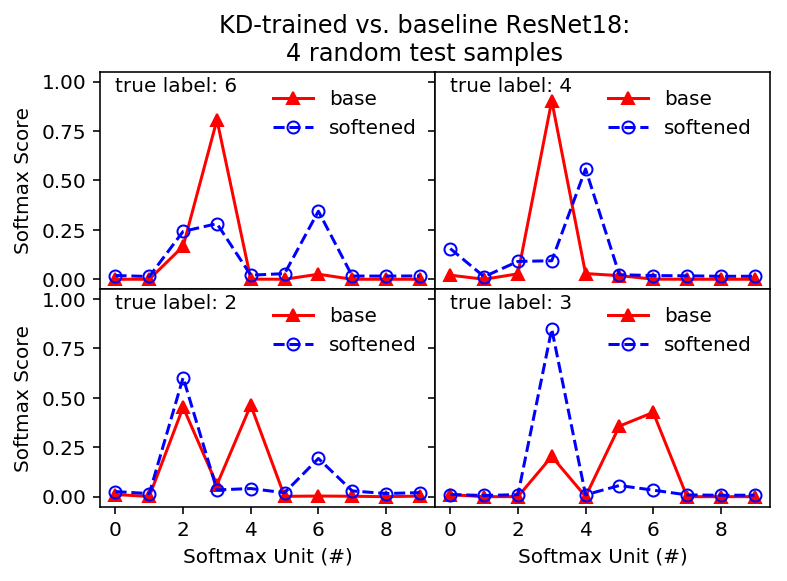

In [191]:
base_dir = '../experiments/base_resnet18'
model_dir = '../experiments/resnet18_distill/resnext_teacher/'

base_predict_correct = np.loadtxt(os.path.join(base_dir, 'predict_correct.txt'))
base_softmax_scores = np.loadtxt(os.path.join(base_dir, 'softmax_scores.txt'))

softmax_scores = np.loadtxt(os.path.join(model_dir, 'dev_temp1.0_softmax_scores.txt'))
predict_correct = np.loadtxt(os.path.join(model_dir, 'dev_temp1.0_predict_correct.txt'))



indices_diff = set(np.where(base_predict_correct==0)[0]) - set(np.where(predict_correct==0)[0])

print(np.where(base_predict_correct==0)[0].shape)
print(np.where(predict_correct==0)[0].shape)
print(len(indices_diff))

base_softmax = []
softened_softmax = []
for i in range(4):
    base_softmax.append(base_softmax_scores[list(indices_diff)[i]])
    softened_softmax.append(softmax_scores[list(indices_diff)[i]])

# Been lazy just using hard-coded true labels here
true_labels = ['6', '4', '2', '3']

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
fig.suptitle('KD-trained vs. baseline ResNet18:\n4 random test samples')
for i, ax in enumerate(axes.flat):
    l1, = ax.plot(np.arange(0, 10), base_softmax[i], 'r^-')
    l2, = ax.plot(np.arange(0, 10), softened_softmax[i], 'bo--', markerfacecolor='None')
    
    ax.legend((l1, l2), ('base', 'softened'), loc='best', framealpha=0.)
    ax.set_ylim(-0.05, 1.05)
    ax.text(0, 0.95, "true label: {}".format(true_labels[i]))
    
    ax.set(xlabel='Softmax Unit (#)', ylabel='Softmax Score')
    ax.label_outer()

fig.subplots_adjust(hspace=0, wspace=0)


# y = np.arange(0, 10, 1)
# x = np.arange(0, 101, 20)
# titles = ['', 'Temperature=2.0', 'Temperature=6.0', 'Temperature=20.0']

# for idx, ax in enumerate(axes.flat):
#     subfig = ax.0)
#     ax.set(title=titles[idx], xlabel='Input Image (#)', ylabel='Softmax Units (#)')
#     ax.label_outer()   # Hide x labels and tick labels for top plots and y ticks for right plots.

# plt.setp(axes, xticks=x, yticks=y)  #set all axes properties at once

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
#                 wspace=0.1, hspace=None)


    
    
    

In [192]:
# save fig
fig.savefig('prediction_scores.png', dpi=600, bbox_inches='tight')

# CNN-distill hypersearch

In [35]:
csv_path = 'cnn_distill_nodropout_alpha_temp_matrix.csv'
data = np.genfromtxt(csv_path, delimiter=',')
data.shape

(6, 9)

In [36]:
temperature = data[0][1:]
alpha = data[1:, 0]
Z = data[1:, 1:]
print(alpha)

[0.05 0.1  0.5  0.95 0.99]


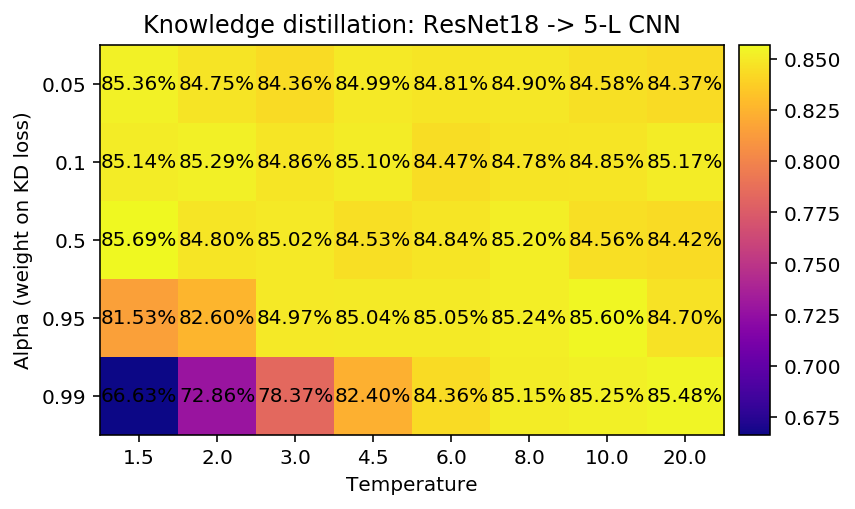

In [37]:
fig, ax = plt.subplots()
im = ax.imshow(Z, cmap='plasma')
plt.xticks(np.arange(0, 8), temperature)
plt.yticks(np.arange(0, 5), alpha)
for (i, j), value in np.ndenumerate(Z):
    label = '{:.2%}'.format(value)
    plt.text(j, i, label, ha='center', va='center')

plt.title("Knowledge distillation: ResNet18 -> 5-L CNN")
plt.xlabel("Temperature")
plt.ylabel("Alpha (weight on KD loss)")

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.10)

plt.colorbar(im, cax=cax)

In [38]:
# save fig
fig.savefig('alpha_temp_matrix.png', dpi=600, bbox_inches='tight')